In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [16]:
def general_summary(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['ae', 'tae', 'convae', 'convtae', 'umap'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple', 'skyblue'],
        hatches = ['//', '\\\\', '||', '--', '..', '//'],
        y_lim = [0, 1],
        interval_length=250
        ):
    """
    Plots the best accuracy for each model and dataset for a fixed percentage of the dataset.
    """
    plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=(18, 8))
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    gs = fig.add_gridspec(ncols=len(datasets), wspace=0)
    axs = gs.subplots(sharex=False, sharey=True)
    axs[0].set_ylabel(f'Accuracy')
    axs[0].set_ylim(y_lim)
    plt.suptitle(f'Model accuracy boxplots')

    for d_index, dataset in enumerate(datasets):
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
            no_reducer_score = no_reducer_score['score']
        data_per_model = []
        ticks = []
        ticks_labels = []
        for m_index, model in enumerate(models):
            percentage_data = []
            for p_index, percentage in enumerate(percentages):
                experiment_name = f'P10_{model}_{dataset}_p{percentage}'
                if model == 'umap':
                    experiment_name = experiment_name[4:]
                try:
                    data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                    max_accuracy = data['score'].max()
                except:
                    max_accuracy = 0
                percentage_data.append(max_accuracy)
                # weights_of_best_score.append(max_score_weight)
            ticks.append(m_index)
            ticks_labels.append(f'{model}')
            data_per_model.append(percentage_data)
        axs[d_index].boxplot(
            data_per_model,
            widths = 0.6,
            positions=range(len(models)),
            patch_artist=True,
            # boxprops = dict(facecolor = colors[d_index], hatch=hatches[d_index])
        )
                # axs[m_index].boxplot(
                #     data['num_trainable_params'],
                #     widths = 0.6,
                #     positions=[p_index],
                #     patch_artist=True,
                #     boxprops = dict(facecolor = colors[m_index], hatch=hatches[m_index])
                # )
                # axs[m_index].plot(p_index, max_score_weight, color='red', marker='.', markersize=10)
        axs[d_index].set_xticks(ticks, ticks_labels, rotation=45)
        axs[d_index].set_xlabel(f'{dataset}')
        axs[d_index].grid()
            # axs[m_index].set_xlim([-0.5, len(percentages)-0.5])
    plt.savefig(f'summary-all.png', transparent=True)
    plt.show()

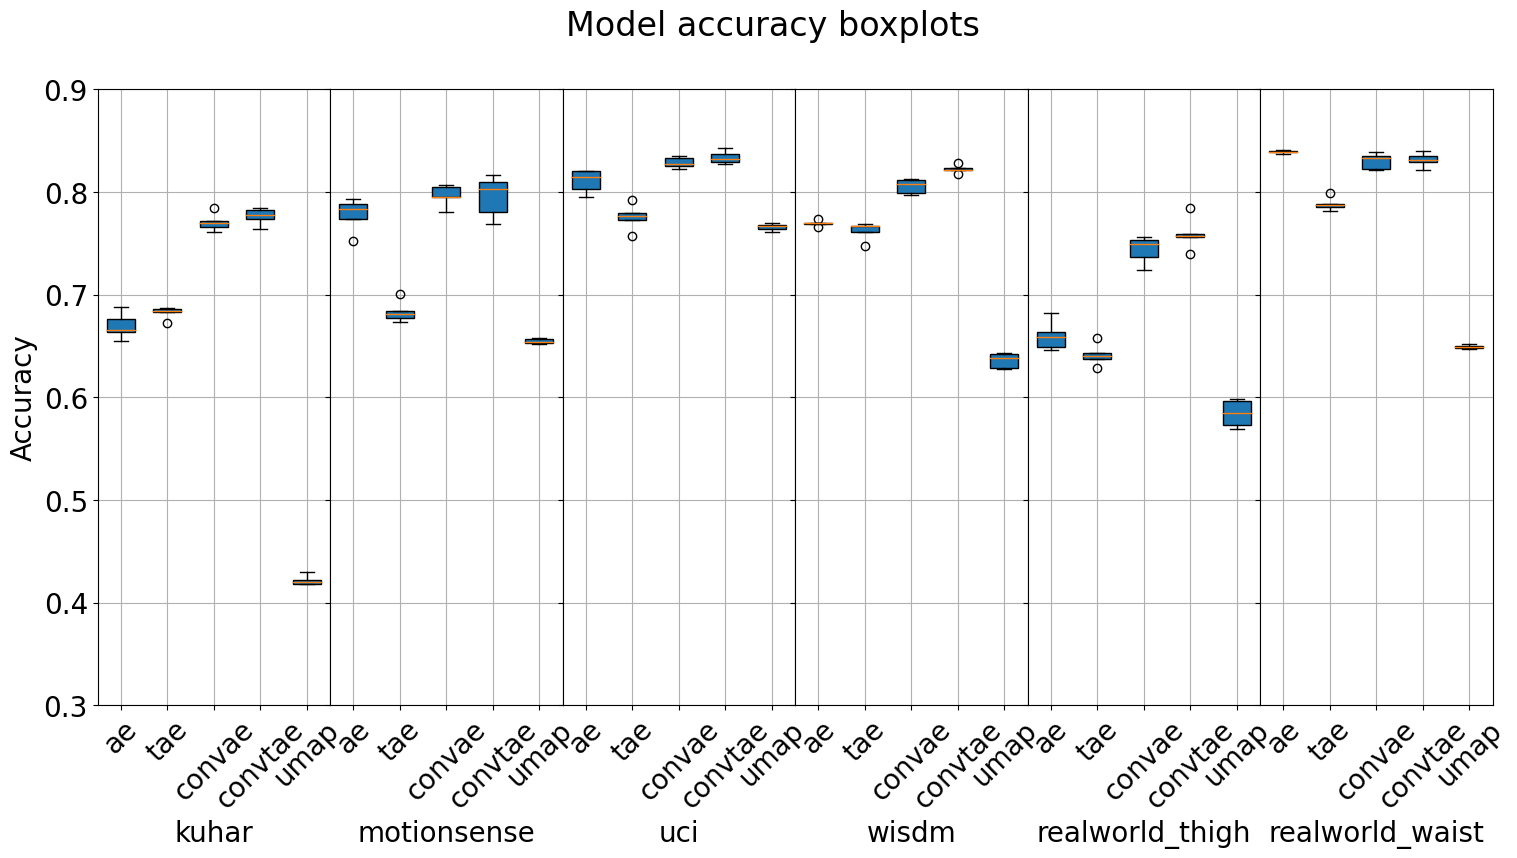

In [18]:
general_summary(datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'], y_lim=[0.3, 0.9])